In [160]:
import sympy as sp
%pylab notebook

h=6.62607004e-34 #Plancks constant #m2 kg / s
k=1.38064852e-23 #Boltzmann constant #m2 kg s-2 K-1
x=logspace(log10(10),log10(3000),200)

Populating the interactive namespace from numpy and matplotlib


/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['beta', 'cov']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [161]:
nu,nu0,s,beta,c0=sp.symbols("nu nu0 s beta c0")

mbb=((nu/nu0)**s)*(nu**3.)/(sp.exp(c0*nu*beta)-1.)

def mbb_der(der_beta=0,der_s=0):
    expr=mbb.diff(beta,der_beta)*mbb.diff(s,der_s)*(beta**der_beta)/mbb
    #expr=mbb.diff(beta,der_beta)*mbb.diff(s,der_s)/mbb
    #print 1./(sp.factorial(der_beta)*sp.factorial(der_s))
    return expr

def taylor_series(n):
    fn=0
    for i in range(n+1):
        for j in range(n+1):
            if i+j<=n:
                #print i,j
                fn = fn + mbb_der(i,j)
    return fn

def taylor_term(n):
    fn=0
    for i in range(n+1):
        for j in range(n+1):
            if i+j==n:
                fn = fn + mbb_der(i,j)
    return fn

In [162]:
def nmbb(nu,T,alpha,nu0=1.):
    x=h*nu*1e9/(k*T)
    Inu=((nu/nu0)**alpha)*(nu**3.)/(exp(x)-1.)
    return Inu

def nmbb1(nu,beta,s,nu0=1,c0=h*1e9/k):
    Inu=((nu/nu0)**s)*(nu**3.)/(exp(c0*nu*beta)-1.)
    return Inu

nu,nu0,s,beta,c0=sp.symbols("nu nu0 s beta c0")
#mbb=((nu/nu0)**s)*(nu**3.)/(sp.exp(c0*nu*beta)-1)
#fn=sp.lambdify((nu,beta,s,nu0,c0),mbb,modules="numpy")

n=0
fn=sp.lambdify((nu,beta,s,nu0,c0),mbb_der(0,0),modules="numpy")

In [163]:
T=15. ; slope=0.
y=nmbb(x,T,slope)
y1=nmbb1(x,1./15.,slope)
y2=fn(x,1./T,slope,1.,h*1e9/k)

<IPython.core.display.Javascript object>


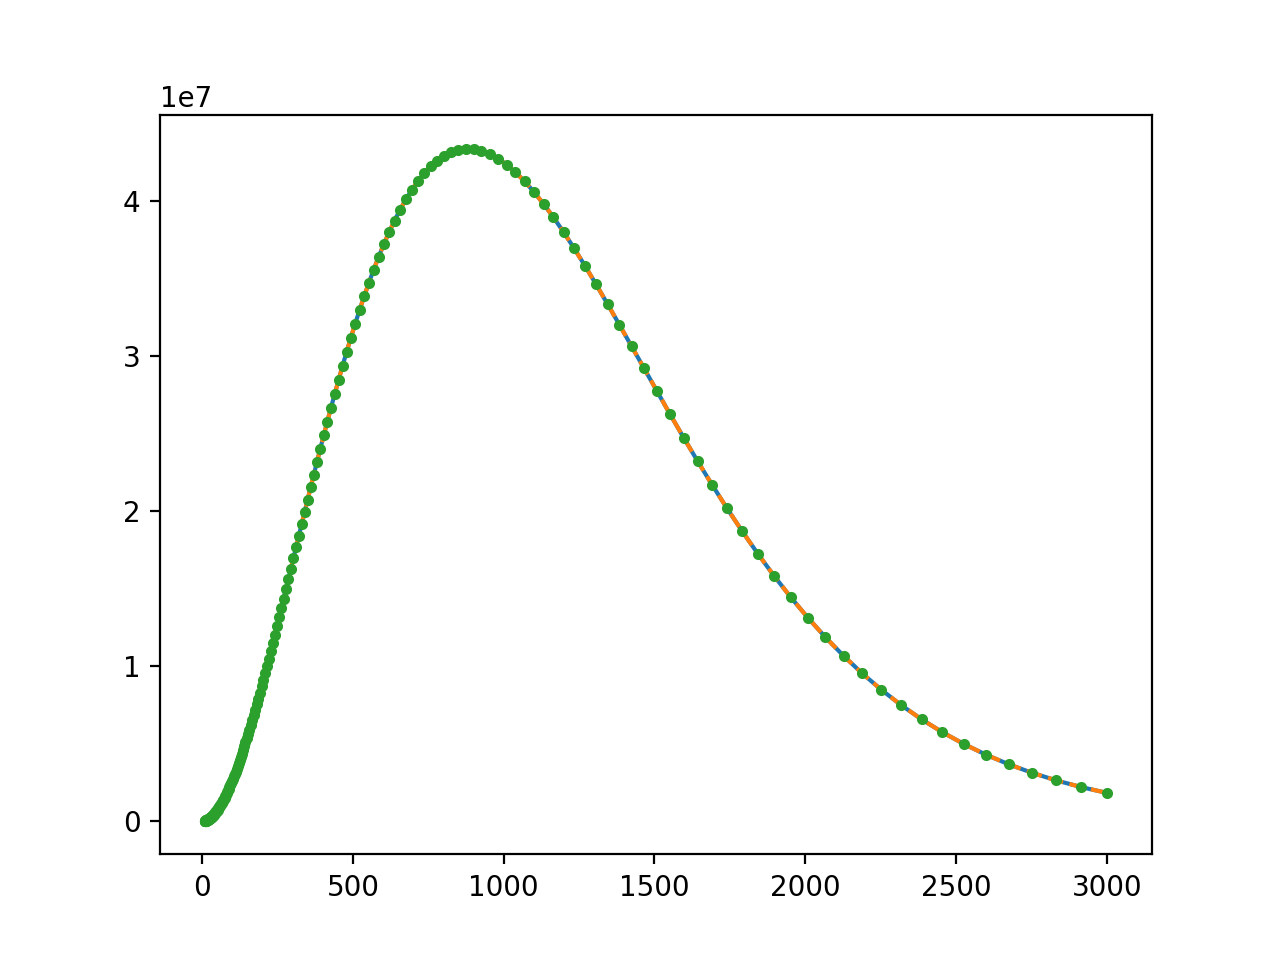

In [164]:
figure()
plot(x,y)
plot(x,y1,"--")
plot(x,y2,".")

In [180]:
d_order=6
v=list()
T=15. ; slope=1.5 ; 
for n in range(d_order+1):
    for i in range(n+1):
        for j in range(n+1): 
            if i+j==n:
                print n,i,j
                fn=sp.lambdify((nu,beta,s,nu0,c0),mbb_der(i,j),modules="numpy")
                temp_v=fn(x,1./T,slope,k*T/h/1e9,h*1e9/k) #; temp_v=temp_v/max(abs(temp_v))
                v.append(temp_v)

0 0 0
1 0 1
1 1 0
2 0 2
2 1 1
2 2 0
3 0 3
3 1 2
3 2 1
3 3 0
4 0 4
4 1 3
4 2 2
4 3 1
4 4 0
5 0 5
5 1 4
5 2 3
5 3 2
5 4 1
5 5 0
6 0 6
6 1 5
6 2 4
6 3 3
6 4 2
6 5 1
6 6 0


<IPython.core.display.Javascript object>


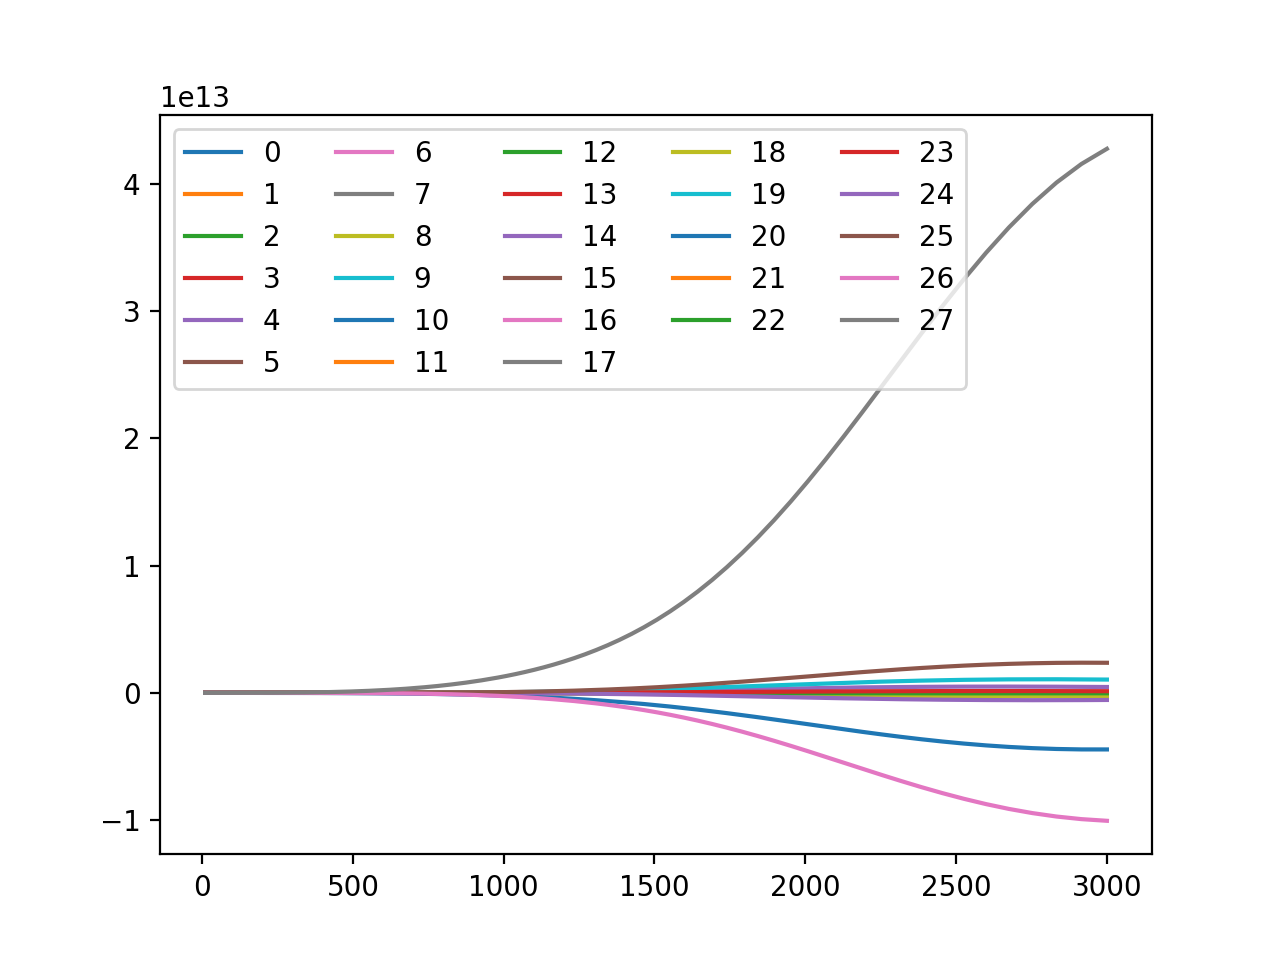

In [181]:
figure()
for i in range(shape(v)[0]):
    plot(x,v[i],label=str(i))
legend(loc=0,ncol=5)

In [182]:
def gram_schmidt(vectors):
    basis = []
    for v in vectors:
        w = v - np.sum( np.dot(v,b)*b  for b in basis )
        #norm=np.linalg.norm(w) ; print norm
        norm=np.sqrt(np.dot(w,w)) #; print norm
        if (norm > 1e-16):  
            basis.append(w/norm)
    return np.array(basis)

In [186]:
b=gram_schmidt(v)
b=gram_schmidt(b)
b=gram_schmidt(b)
b=gram_schmidt(b)

<IPython.core.display.Javascript object>


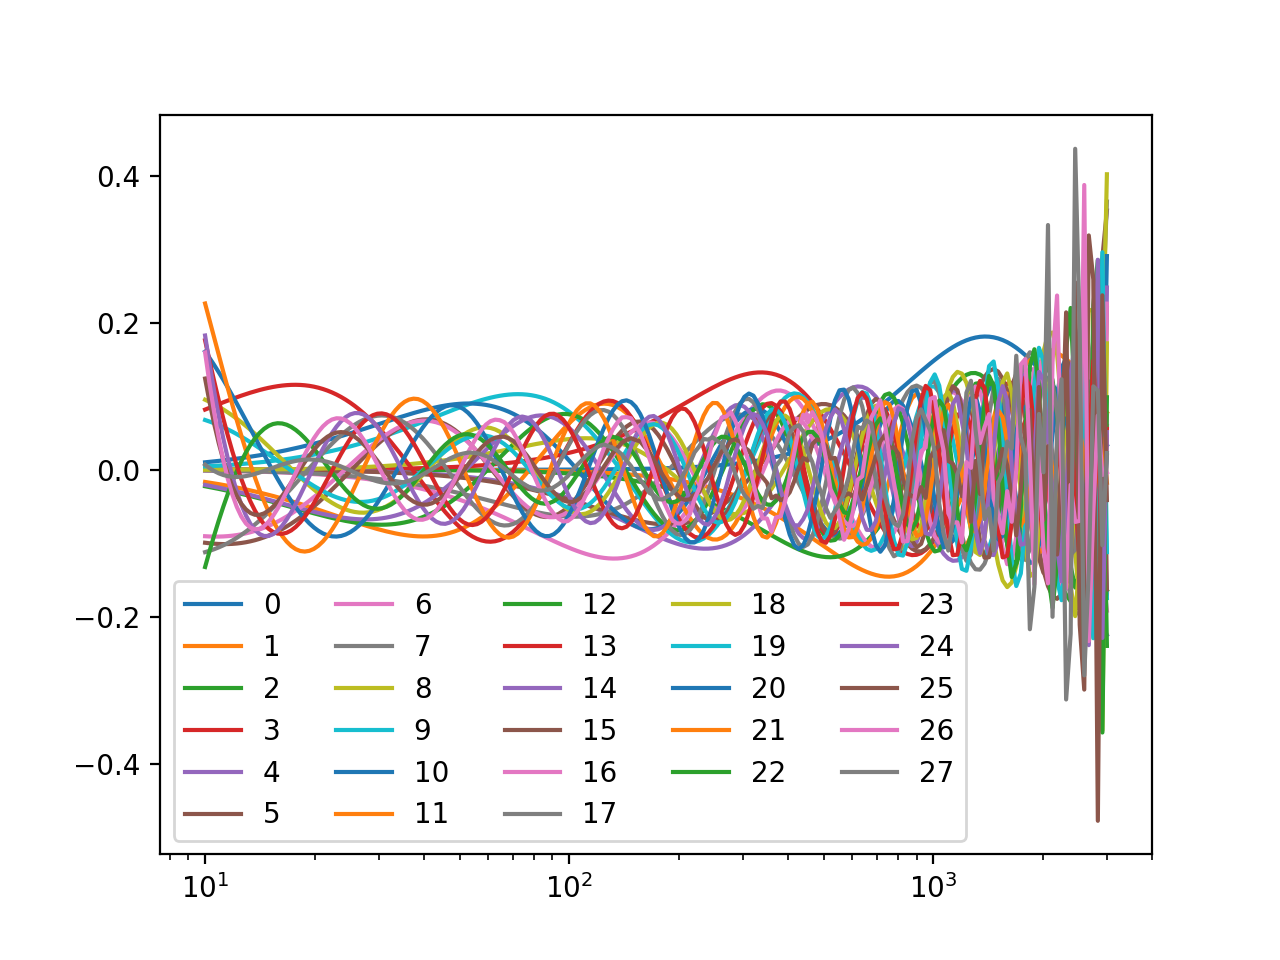

[]

In [187]:
figure()
for i in range(shape(v)[0]):
    plot(x,b[i],label=str(i))
legend(loc=0,ncol=5)
semilogx()

<IPython.core.display.Javascript object>


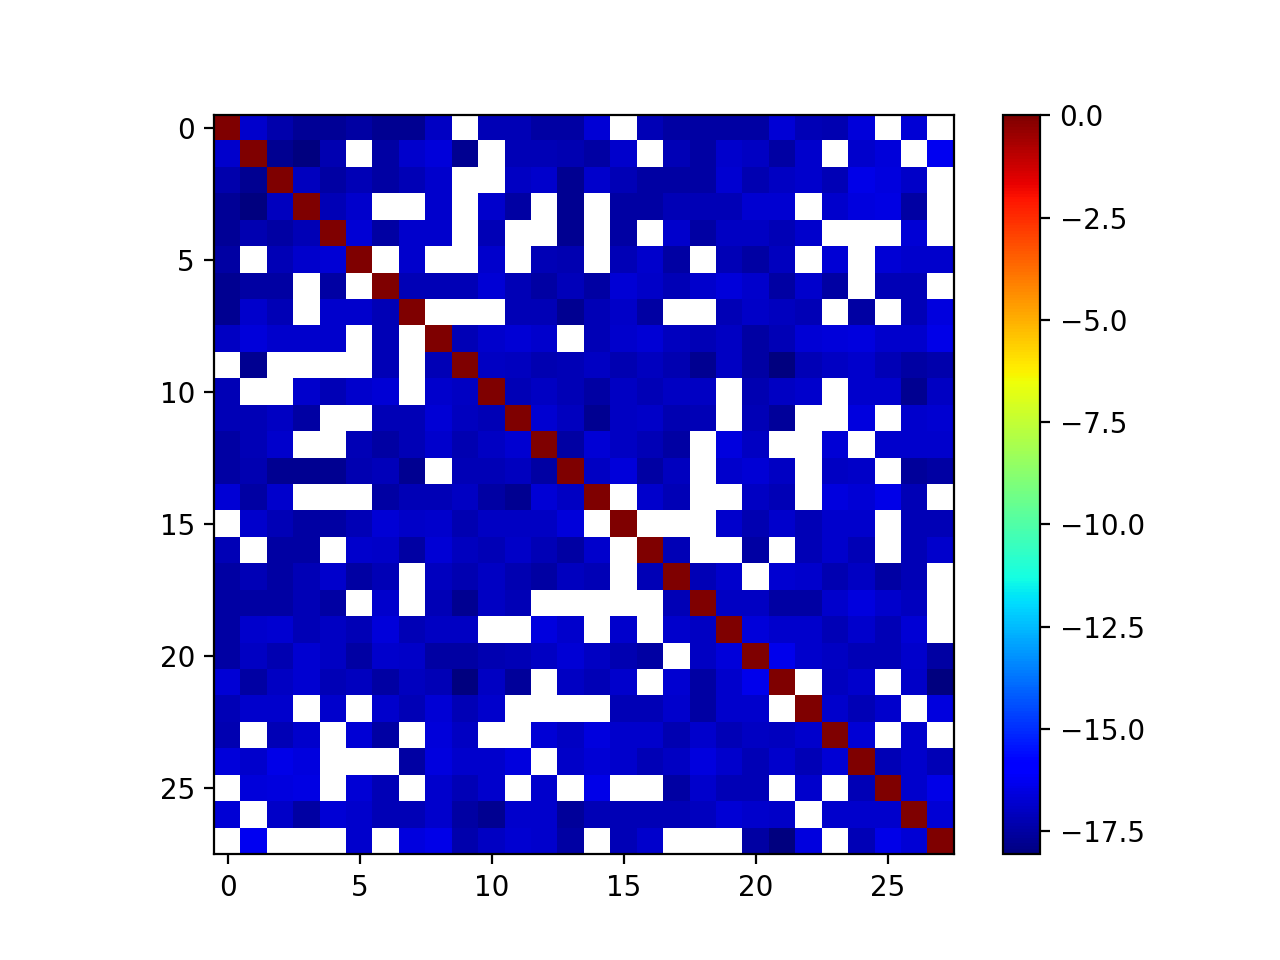

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log10


In [188]:
cov=zeros((shape(v)[0],shape(v)[0]),float)
for i in range(shape(v)[0]):
    for j in range(shape(v)[0]):
        cov[i,j]=dot(b[i],b[j])
        
figure()
imshow(log10(abs(cov)))
colorbar()

In [152]:
mbb_der(0,0)

nu**3.0*(nu/nu0)**s/(exp(beta*c0*nu) - 1.0)